In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [82]:
df = pd.read_csv("data/PacificData.csv")
df.tail()

,DATAFLOW,FREQ: Frequency,INDICATOR: Indicator,IMPORTER: Importer,EXPORTER: Exporter,COMMODITY: Commodity,TIME_PERIOD: Time,OBS_VALUE,UNIT_MEASURE: Unit of measure,UNIT_MULT: Unit multiplier,OBS_STATUS: Observation Status,DATA_SOURCE: Data source,OBS_COMMENT: Comment
6558,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2014,1822,TON: tonnes,NaN,NaN,NaN,NaN
6559,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2015,2070,TON: tonnes,NaN,NaN,NaN,NaN
6560,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2016,1874,TON: tonnes,NaN,NaN,NaN,NaN
6561,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2017,1978,TON: tonnes,NaN,NaN,NaN,NaN
6562,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,PG: Papua New Guinea,AU_NZ: Australia and New Zealand,"03: Fish, crustaceans, molluscs, aquatic inver...",2018,1207,TON: tonnes,NaN,NaN,NaN,NaN


In [83]:
df.columns

Index(['DATAFLOW', 'FREQ: Frequency', 'INDICATOR: Indicator',
       'IMPORTER: Importer', 'EXPORTER: Exporter', 'COMMODITY: Commodity',
       'TIME_PERIOD: Time', 'OBS_VALUE', 'UNIT_MEASURE: Unit of measure',
       'UNIT_MULT: Unit multiplier', 'OBS_STATUS: Observation Status',
       'DATA_SOURCE: Data source', 'OBS_COMMENT: Comment'],
      dtype='object')

In [84]:
df[df.columns[8]].value_counts()

TON: tonnes    6563
Name: UNIT_MEASURE: Unit of measure, dtype: int64

In [85]:
column_to_drop = ['DATAFLOW',
                  'FREQ: Frequency',
                  'INDICATOR: Indicator',
                  'EXPORTER: Exporter',
                  'UNIT_MEASURE: Unit of measure',
                  'UNIT_MULT: Unit multiplier',
                  'OBS_STATUS: Observation Status',
                  'DATA_SOURCE: Data source',
                  'OBS_COMMENT: Comment']
df = df.drop(column_to_drop,axis=1)

In [86]:
df.head()

,IMPORTER: Importer,COMMODITY: Commodity,TIME_PERIOD: Time,OBS_VALUE
0,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1995,13
1,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1996,29
2,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1997,19
3,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1998,28
4,CK: Cook Islands,"03: Fish, crustaceans, molluscs, aquatic inver...",1999,35


In [87]:
df["IMPORTER: Importer"] = df["IMPORTER: Importer"].apply(lambda x: x.split(": ")[1])
df["COMMODITY: Commodity"] = df["COMMODITY: Commodity"].apply(lambda x: x.split(": ")[1])
df.head(2)

,IMPORTER: Importer,COMMODITY: Commodity,TIME_PERIOD: Time,OBS_VALUE
0,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1995,13
1,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1996,29


In [88]:
df["TIME_PERIOD: Time"] = pd.to_datetime(df["TIME_PERIOD: Time"],format='%Y')

In [89]:
df.describe()

,OBS_VALUE
count,6563.000000
mean,2522.195337
std,13836.508104
min,0.000000
25%,30.000000
50%,192.000000
75%,943.000000
max,278639.000000


In [90]:
df.shape

(6563, 4)

In [91]:
column_names = {"IMPORTER: Importer":"name",
                "COMMODITY: Commodity":"commodity",
                "TIME_PERIOD: Time":"date",
                "OBS_VALUE":"value"}
df.rename(columns=column_names,inplace=True)

In [92]:
df.head(2)

,name,commodity,date,value
0,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1995-01-01,13
1,Cook Islands,"Fish, crustaceans, molluscs, aquatic invertebr...",1996-01-01,29


In [93]:
df.iloc[27,1]

'Coffee, tea, mate and spices'

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6563 entries, 0 to 6562
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       6563 non-null   object        
 1   commodity  6563 non-null   object        
 2   date       6563 non-null   datetime64[ns]
 3   value      6563 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 205.2+ KB


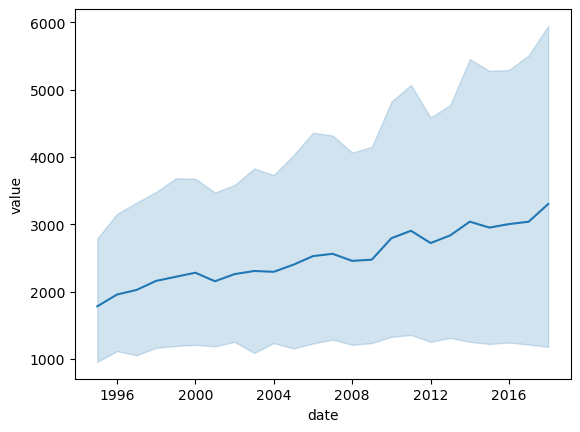

In [95]:
sns.lineplot(data=df, x="date", y="value")
plt.show()

In [96]:
fig = px.line(df, x="date", y="value", color='name')
fig.show()

In [97]:
df_year = df.groupby(["name","date"]).sum().reset_index()
fig = px.line(df_year, x="date", y="value", color='name')
fig.show()

In [98]:
df_year = df_year[df_year.name != "Tokelau"]

In [99]:
#df_year = df_year.pivot_table(index='Year', columns='Importer', values='Tons', aggfunc='sum')

In [100]:
#not enough data for Tokelau, so remove
df = df[df['name'] != 'Tokelau']
df_year =df_year[df_year.name != "Tokelau"]
df.shape

(6540, 4)

In [101]:
df_year.to_csv("data/CountryYearly.csv",index=False)

### Clean global data for voronoi chart 

In [102]:
df_global = pd.read_csv("data/DataWorldPacific.csv")
df_global.head()

,DATAFLOW,FREQ: Frequency,INDICATOR: Indicator,IMPORTER: Importer,EXPORTER: Exporter,COMMODITY: Commodity,TIME_PERIOD: Time,OBS_VALUE,UNIT_MEASURE: Unit of measure,UNIT_MULT: Unit multiplier,OBS_STATUS: Observation Status,DATA_SOURCE: Data source,OBS_COMMENT: Comment
0,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,VU: Vanuatu,EUR: Europe,02: Meat and edible meat offal,1996,0,TON: tonnes,NaN,NaN,NaN,NaN
1,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,VU: Vanuatu,EUR: Europe,02: Meat and edible meat offal,1998,28,TON: tonnes,NaN,NaN,NaN,NaN
2,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,VU: Vanuatu,EUR: Europe,02: Meat and edible meat offal,2003,0,TON: tonnes,NaN,NaN,NaN,NaN
3,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,VU: Vanuatu,EUR: Europe,02: Meat and edible meat offal,2004,2,TON: tonnes,NaN,NaN,NaN,NaN
4,SPC:DF_TRADE_FOOD(1.0),A: Annual,Q: Quantity,VU: Vanuatu,EUR: Europe,02: Meat and edible meat offal,2006,1,TON: tonnes,NaN,NaN,NaN,NaN


In [103]:
df_global2018 = df_global[df_global["TIME_PERIOD: Time"] == 2018]
df_global1996 = df_global[df_global["TIME_PERIOD: Time"] == 1996]
column_to_drop = ['DATAFLOW',
                  'FREQ: Frequency',
                  'INDICATOR: Indicator',
                  'UNIT_MEASURE: Unit of measure',
                  'UNIT_MULT: Unit multiplier',
                  'OBS_STATUS: Observation Status',
                  'DATA_SOURCE: Data source',
                  'OBS_COMMENT: Comment']
df_global2018 = df_global2018.drop(column_to_drop,axis=1)
df_global1996 = df_global1996.drop(column_to_drop,axis=1)

In [104]:
column_names = {"IMPORTER: Importer":"importer",
                "EXPORTER: Exporter":"Country",
                "COMMODITY: Commodity":"commodity",
                "TIME_PERIOD: Time":"date",
                "OBS_VALUE":"Total2018"}
df_global2018.rename(columns=column_names,inplace=True)
df_global1996.rename(columns=column_names,inplace=True)

In [105]:
df_global2018 = df_global2018.groupby(["Country"]).sum()["Total2018"].reset_index()
df_global1996 = df_global1996.groupby(["Country"]).sum()["Total2018"].reset_index()

In [106]:
df_global2018["Country"] = df_global2018["Country"].apply(lambda x: x.split(": ")[1])
df_global1996["Country"] = df_global1996["Country"].apply(lambda x: x.split(": ")[1])

In [107]:
df_global2018["Region"] = "Rest of World"
df_global1996["Region"] = "Rest of World"

In [108]:
df_global2018.loc[df_global2018["Country"] == "Australia and New Zealand", "Region"] = "Oceania"
df_global2018.loc[df_global2018["Country"] == "Pacific Islands Countries and Territories", "Country"] = "Pacific countries"
df_global2018.loc[df_global2018["Country"] == "Pacific Islands Countries and Territories", "Region"] = "Oceania"
df_global1996.loc[df_global1996["Country"] == "Australia and New Zealand", "Region"] = "Oceania"
df_global1996.loc[df_global1996["Country"] == "Pacific Islands Countries and Territories", "Country"] = "Pacific countries"
df_global1996.loc[df_global1996["Country"] == "Pacific Islands Countries and Territories", "Region"] = "Oceania"

In [109]:
# Convert 'Total2018' to percentages of the total
df_global2018['Total2018'] = (df_global2018['Total2018'] / df_global2018['Total2018'].sum()) * 100
df_global1996['Total2018'] = (df_global1996['Total2018'] / df_global1996['Total2018'].sum()) * 100

In [110]:
df_global2018.to_csv("data/GlobalVoronoi2018",index=False)
df_global1996.to_csv("data/GlobalVoronoi1996",index=False)

In [111]:
#df_bubble_chart = df[df["date"] == "2018-01-01"]

In [112]:
#top 16 bubbles
countries_bubbles = ['Cook Islands', 'Tonga', 'Vanuatu', 'Kiribati', 'New Caledonia',
       'Nauru', 'Federated State of Micronesia', 'Niue',
       'Papua New Guinea', 'Samoa', 'Fiji', 'Solomon Islands',
       'French Polynesia', 'Marshall Islands',
       'Wallis and Futuna Islands','Tuvalu']

In [113]:
df_bubble_chart = df[df.name.isin(countries_bubbles)]

In [114]:
df_bubble_chart.to_csv("data/BubbleChartPlot.csv",index=False)

In [115]:
df_commodity = df.groupby(["date","commodity"]).sum().reset_index()
df_commodity = df_commodity.pivot_table(index='date', columns='commodity', values='value', aggfunc='sum').reset_index()

In [116]:
df_commodity.to_csv("data/CommodityStream.csv",index=False)

In [122]:
df.to_csv("data/FinalPlot.csv",index=False)